In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [98]:
time_col, value_col = 'time', 'value'
data_file='wind_dataset.csv'
wind_date_col, wind_value_col = 'DATE', 'WIND'
wind_col_dict = { wind_date_col: time_col, wind_value_col: value_col }

In [99]:
df=pd.read_csv(data_file,parse_dates=[wind_date_col])
df= df.rename(columns=wind_col_dict)
df=df.set_index(time_col, drop=True)

In [100]:
df.head()

,value,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
time,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [101]:
df.isna().sum()

value        0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [102]:
df['T.MIN'].fillna(value=df['T.MIN'].mean(), inplace=True)
df['T.MAX'].fillna(value=df['T.MAX'].mean(), inplace=True)
df['IND.2'].fillna(value=df['IND.2'].mean(), inplace=True)
df['IND.1'].fillna(value=df['IND.1'].mean(), inplace=True)
df['T.MIN.G'].fillna(value=df['T.MIN.G'].mean(), inplace=True)

In [103]:
df.isna().sum()

value      0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [104]:
df.head()

,value,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
time,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [105]:
data1=df.copy()


In [106]:
data1.head()


,value,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
time,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


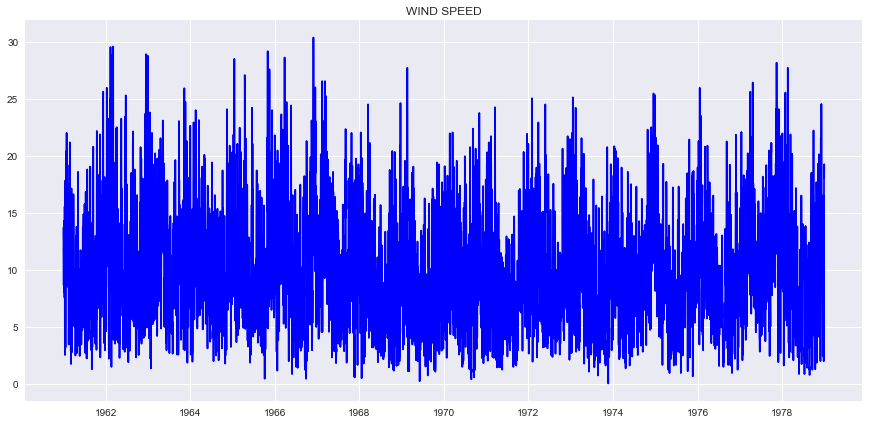

In [107]:
plt.figure(figsize=(15,7))
plt.plot(data1['value'],color='blue')
plt.title("WIND SPEED")
plt.show()

In [108]:
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data1, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(data1, autolag='AIC')
    else:
        adf_test = adfuller(data1[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'n_lags: {adf_test[2]}')
    print(f'p-value: {adf_test[1]:.20f}')
    for key, value in adf_test[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    return test_result

In [109]:
adf_test_results = {
    col: test_stationarity(data1, col)
    for col in data1.columns}
adf_test_results

ADF Statistic: -8.41301295836898
n_lags: 35
p-value: 0.00000000000020792341
Critial Values:
   1%, -3.4313505918186142
Critial Values:
   5%, -2.8619821762825577
Critial Values:
   10%, -2.5670053670299926
ADF Statistic: -9.10531062802816
n_lags: 29
p-value: 0.00000000000000351562
Critial Values:
   1%, -3.431349674045335
Critial Values:
   5%, -2.8619817707732094
Critial Values:
   10%, -2.5670051511687295
ADF Statistic: -26.00874987942248
n_lags: 6
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4313461714566476
Critial Values:
   5%, -2.8619802231867366
Critial Values:
   10%, -2.567004327355685
ADF Statistic: -4.715674096943592
n_lags: 35
p-value: 0.00007862877740420929
Critial Values:
   1%, -3.4313505918186142
Critial Values:
   5%, -2.8619821762825577
Critial Values:
   10%, -2.5670053670299926
ADF Statistic: -5.521002180414387
n_lags: 20
p-value: 0.00000187775858226508
Critial Values:
   1%, -3.4313483005378655
Critial Values:
   5%, -2.8619811639018327
Critial Values

{'value': 'Stationary',
 'IND': 'Stationary',
 'RAIN': 'Stationary',
 'IND.1': 'Stationary',
 'T.MAX': 'Stationary',
 'IND.2': 'Stationary',
 'T.MIN': 'Stationary',
 'T.MIN.G': 'Stationary'}

In [110]:
from statsmodels.tsa.stattools import acf, pacf
from matplotlib import dates as mpl_dates

In [111]:
def check_mean_std(ts, name):

    rolmean = ts.rolling(window=192).mean()
    rolstd = ts.rolling(window=192).std()
    plt.figure(figsize=(12,8))   
    print(name)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,8))
    plt.plot(ts, color='red',label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.ylabel("WIND")
    plt.title('Log Scale Differeced WIND Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()



WIND


<Figure size 864x576 with 0 Axes>

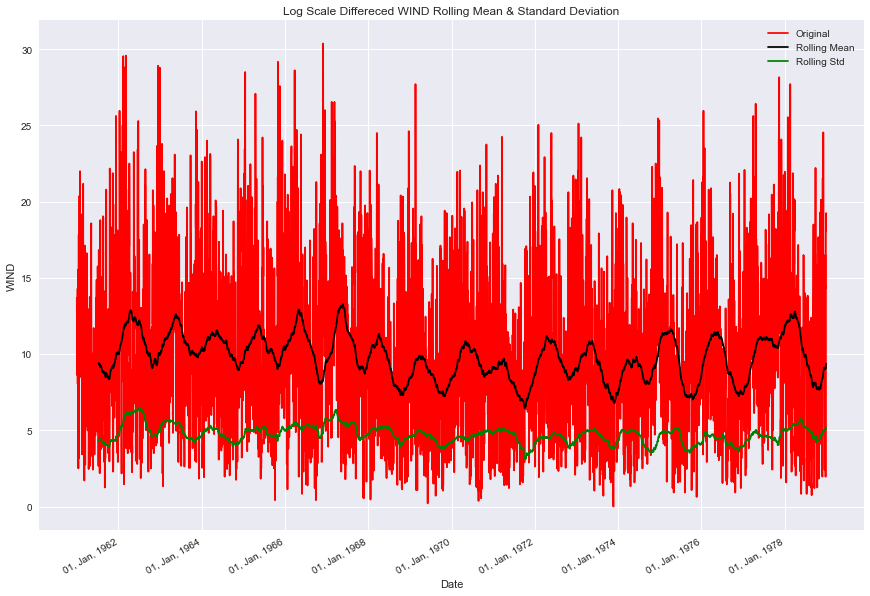



WIND


<Figure size 864x576 with 0 Axes>

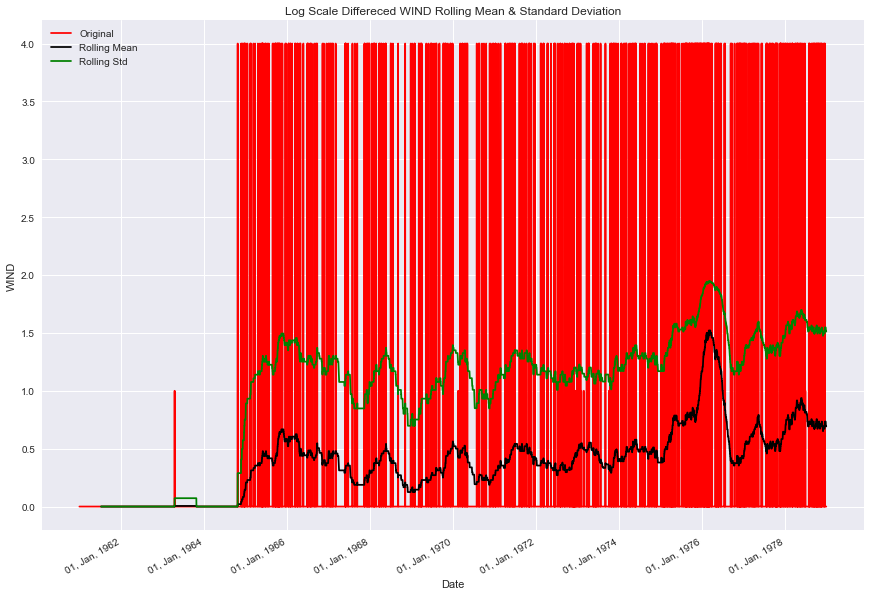



WIND


<Figure size 864x576 with 0 Axes>

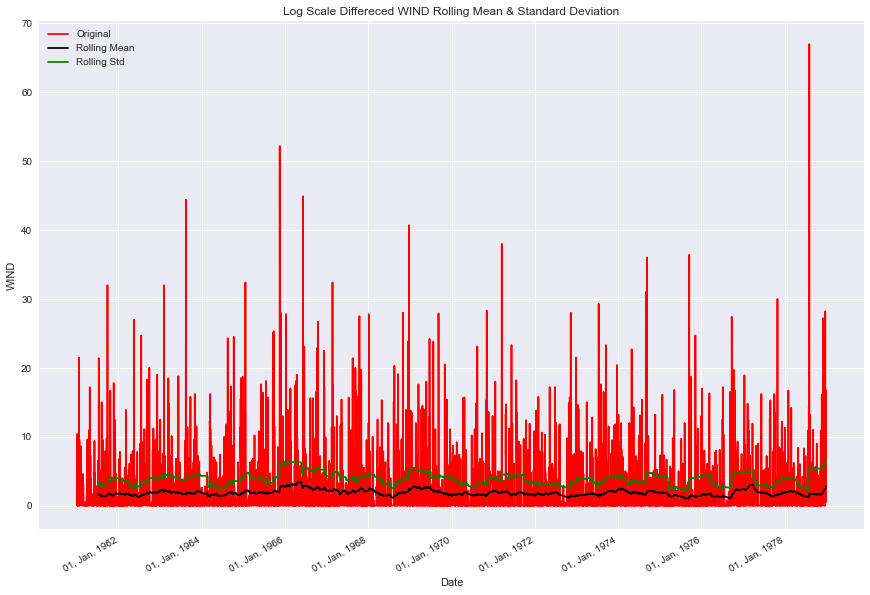

In [112]:
check_mean_std(data1['value'],'\n\nWIND')
check_mean_std(data1['IND'],'\n\nWIND')
check_mean_std(data1['RAIN'],'\n\nWIND')


In [113]:


from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data1['value'], model='additive')
seasonal, trend, resid = result.seasonal, result.trend, result.resid


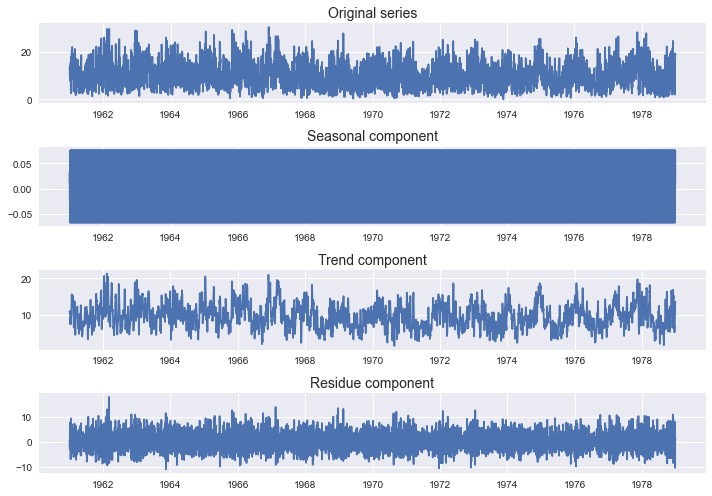

In [114]:
plot_data = [data1['value'], seasonal, trend, resid]
title_list = ['Original series', 'Seasonal component', 'Trend component', 'Residue component']
fig, axs = plt.subplots(len(plot_data), figsize=(10, 7))
for ax, data, title in zip(axs, plot_data, title_list):
    ax.plot(data)
    ax.set_title(title, fontsize=14)

plt.tight_layout()

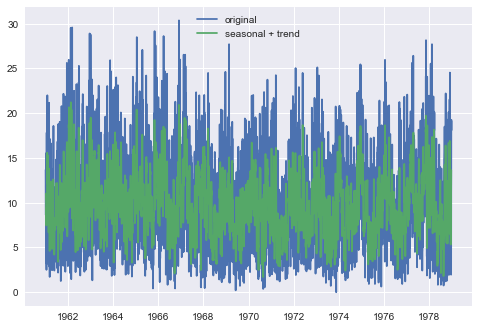

In [115]:

plt.plot(data1['value'], label="original", zorder=1)
plt.plot(trend + seasonal, label="seasonal + trend", zorder=2)
plt.legend(); plt.show()

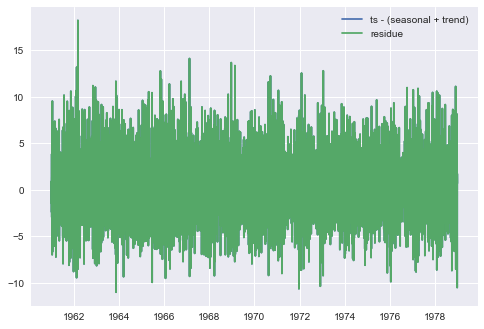

In [116]:
plt.plot(data1[value_col] - (trend + seasonal), label='ts - (seasonal + trend)')
plt.plot(resid, label='residue')
plt.legend(); plt.show()


In [117]:
cleaned_data = seasonal + trend
res_mean = resid.mean()
resid_std = resid.std()

lower_bound = res_mean - 4*resid_std
upper_bound = res_mean + 4*resid_std

In [118]:
anomalies = data1[(resid < lower_bound) | (resid > upper_bound)]
anomalies.head()

,value,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
time,,,,,,,,
1962-03-07,29.58,0,2.7,0.0,5.5,1.0,-1.2,-4.7
1967-02-15,26.54,0,11.4,0.0,8.8,0.0,2.0,-1.0


<AxesSubplot:xlabel='time'>

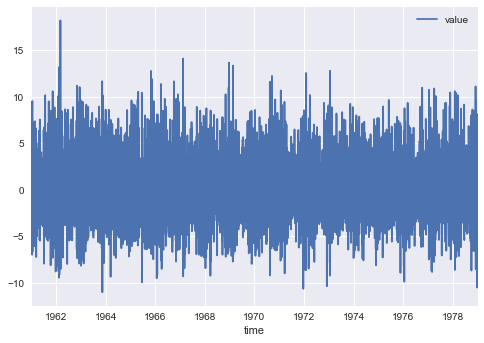

In [119]:
residue_df = pd.DataFrame(resid)
residue_df = residue_df.rename(columns={'resid':value_col})
residue_df.plot()

In [120]:
def get_anomaly_array_using_cutoff_point(input_dataframe: pd.DataFrame, cutoff_point: float) -> np.ndarray:
    anomaly_array = np.array(input_dataframe[value_col] > cutoff_point)
    anomaly_array = np.where(anomaly_array == 0, np.nan, anomaly_array)
    return anomaly_array
def plot_data_anomalies(original_dataframe: pd.DataFrame, anomaly_array: list, ) -> None:
    plt.plot_date(original_dataframe.index, original_dataframe[value_col], linestyle='--', zorder=1)
    plt.scatter(original_dataframe.index, anomaly_array * original_dataframe[value_col],
                color='r', marker='D', zorder=2)

def detect_anomalies_using_mean_std_method(
        input_dataframe: pd.DataFrame, threshold: float = 3, plot_cutoff: bool = False) -> np.ndarray:
    input_dataframe[value_col] = input_dataframe[value_col].abs()
    mean = input_dataframe[value_col].mean()
    std = input_dataframe[value_col].std()
    cutoff_value = mean + threshold * std
    print(f"Mean value = {mean:.2f}, Standard deviation value = {std:.2f}, Cutoff value = {cutoff_value:.2f}")

    if plot_cutoff:
        plot_the_impact_of_cutoff_value(input_dataframe, cutoff_value)

    anomaly_array = get_anomaly_array_using_cutoff_point(input_dataframe, cutoff_value)
    return anomaly_array
def plot_the_impact_of_cutoff_value(input_dataframe: pd.DataFrame, cutoff_value: float) -> None:
    plt.plot(input_dataframe[value_col])
    plt.fill_between(
        input_dataframe.index, y1=0, y2=cutoff_value, alpha=0.2, color='green', linestyle='--', linewidth=2)
    

Mean value = 2.70, Standard deviation value = 2.15, Cutoff value = 9.14


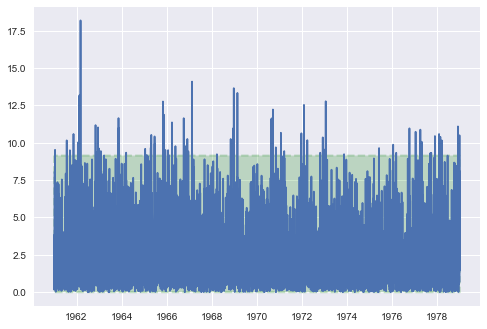

In [121]:
anomaly_array = detect_anomalies_using_mean_std_method(residue_df, plot_cutoff=True)

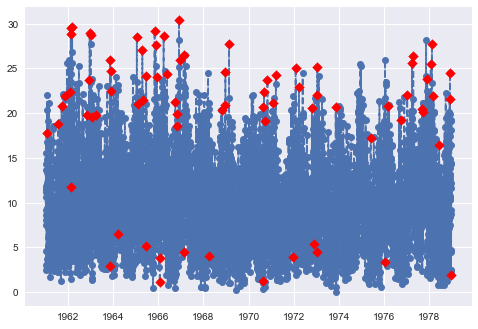

In [122]:
plot_data_anomalies(df, anomaly_array)

In [123]:
len(anomaly_array)

6574

In [35]:
# VAR Model

In [124]:
df.head()

,value,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
time,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [125]:
from statsmodels.tsa.api import VAR

max_lag = 25
var_model = VAR(df)

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [126]:
results = var_model.select_order(max_lag)
lag = results.aic
print(lag)

7


In [127]:
def find_anomalies(squared_err):
    global cutoff
    predictions = (squared_err >= cutoff).astype(int)
    
    cutoff = np.mean(squared_err) + np.std(squared_err)
    
    return predictions, cutoff

In [128]:
#cutoff = 0

model = var_model.fit(lag)
squared_err = model.resid.sum(axis=1) ** 2
predictions, cutoff = find_anomalies(squared_err)

In [129]:
predictions

time
1961-01-08    0
1961-01-09    0
1961-01-10    0
1961-01-11    0
1961-01-12    0
             ..
1978-12-27    1
1978-12-28    1
1978-12-29    0
1978-12-30    0
1978-12-31    0
Length: 6567, dtype: int32

In [130]:
df = df.iloc[lag:, :]
df['Preds'] = predictions.values

C:\Users\Sahishnuta\AppData\Local\Temp\ipykernel_24936\1712378839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preds'] = predictions.values


In [131]:
df['Preds'].value_counts()

0    5987
1     580
Name: Preds, dtype: int64

### Prophet

In [43]:
df = pd.read_csv('wind_dataset.csv')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [44]:
time_col, value_col = 'time', 'value'
data_file='wind_dataset.csv'
wind_date_col, wind_value_col = 'DATE', 'WIND'
wind_col_dict = { wind_date_col: time_col, wind_value_col: value_col }

In [47]:
df=pd.read_csv(data_file,parse_dates=[wind_date_col])
df= df.rename(columns=sun_spot_col_dict)
#df=df.set_index(time_col, drop=True)

In [50]:
df_prophet = df.reset_index().rename(columns={wind_date_col: 'ds', wind_value_col: 'y'}).copy()
df_prophet.head()

,index,ds,y,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [51]:
model = Prophet()
model.fit(df_prophet)

07:50:57 - cmdstanpy - INFO - Chain [1] start processing
07:50:58 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = model.make_future_dataframe(periods=0, freq='M', include_history=True)
future.tail()

,ds
6569,1978-12-27
6570,1978-12-28
6571,1978-12-29
6572,1978-12-30
6573,1978-12-31


In [53]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6569,1978-12-27,10.197277,5.954720,17.605042,10.197277,10.197277,1.625095,1.625095,1.625095,0.027098,0.027098,0.027098,1.597997,1.597997,1.597997,0.0,0.0,0.0,11.822373
6570,1978-12-28,10.197821,6.053671,17.809638,10.197821,10.197821,1.529149,1.529149,1.529149,-0.068598,-0.068598,-0.068598,1.597747,1.597747,1.597747,0.0,0.0,0.0,11.726970
6571,1978-12-29,10.198364,5.753393,18.182106,10.198364,10.198364,1.546901,1.546901,1.546901,-0.057467,-0.057467,-0.057467,1.604368,1.604368,1.604368,0.0,0.0,0.0,11.745265
6572,1978-12-30,10.198907,5.767344,18.211908,10.198907,10.198907,1.695157,1.695157,1.695157,0.077158,0.077158,0.077158,1.617998,1.617998,1.617998,0.0,0.0,0.0,11.894063
6573,1978-12-31,10.199450,6.174098,17.491514,10.199450,10.199450,1.656434,1.656434,1.656434,0.017842,0.017842,0.017842,1.638592,1.638592,1.638592,0.0,0.0,0.0,11.855884


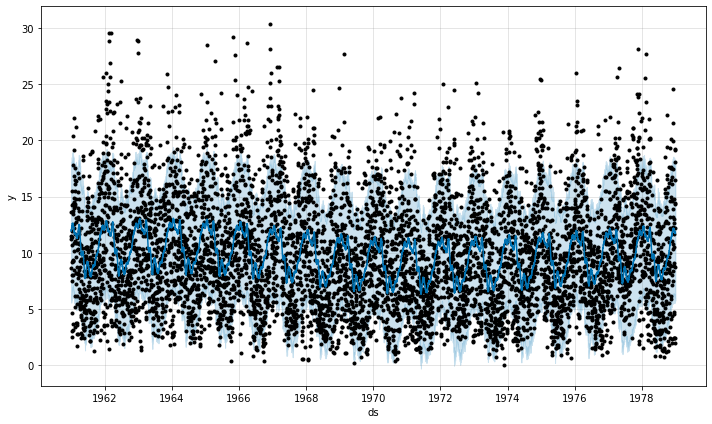

In [54]:
model.plot(forecast)
plt.show()

In [55]:
forecast["y"] = df_prophet["y"]
anomaly_array = np.array((forecast["y"] > forecast["yhat_upper"]) | (forecast["y"] < forecast["yhat_lower"]))
anomaly_array = np.where(anomaly_array==0, np.nan, anomaly_array)

KeyError: ignored

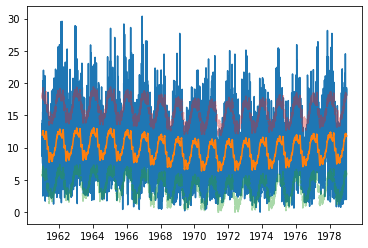

In [58]:
plt.plot(df_prophet.ds, df_prophet.y, label="original")
plt.plot(forecast.ds, forecast.yhat, label="yhat")

plt.plot(forecast.ds, forecast.yhat_lower, '--', label="yhat lower", alpha=0.4)
plt.plot(forecast.ds, forecast.yhat_upper, '--', label="yhat upper", alpha=0.4)

plt.scatter(df.index, anomaly_array * df[value_col], color='r', marker='D', zorder=2)

plt.legend(); plt.show()